# <center> <font color=blue> Demand Analysis for BoomBikes </font></center>

<b>Problem Statement:</b><br>
BoomBikes,a US bike-sharing provider aspires to understand factors affecting the demand for shared bikes in the American market.The company wants to know:<br>

 1. Variables that are significant in predicting the demand for shared bikes.
 2. How well those variables describe the bike demands

<b>Background Information: </b> <br>
BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

For this, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors using which prime factors effecting the demand are to be calculated
    

In [428]:
# import required libraries

import numpy as np
import pandas as pd

# Libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [429]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

<i> The data collected has been provided in the form of a csv file. So importing that</i>

In [430]:
# import the data 

bikes = pd.read_csv(r"day.csv")

In [431]:
# Display top 5 rows of dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [432]:
# Display shape of the data set
bikes.shape

(730, 16)

Copying the metadata provided in readme.txt for easier access<br>
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [433]:
# Remove any spaces that might be present at the either ends of columns
bikes.columns.str.strip()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Mentioned instant is record index, so this might be unique in the data set

In [434]:
# Check for uniqueness of instant
bikes.instant.nunique()

730

<i> Since number of rows is equal to number of unique values of instant. So this is a unique variable and can be considered primary key. So making this as index</i>

In [435]:
# Make instant as index
bikes.set_index('instant',inplace=True)

In [436]:
# Display top 5 rows
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Before proceeding for Analysis, Checking if there are any null Values in data set and addressing them

In [437]:
# Check if there are any null values in data
bikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no null values in the data provided

Create Plots to check relationships

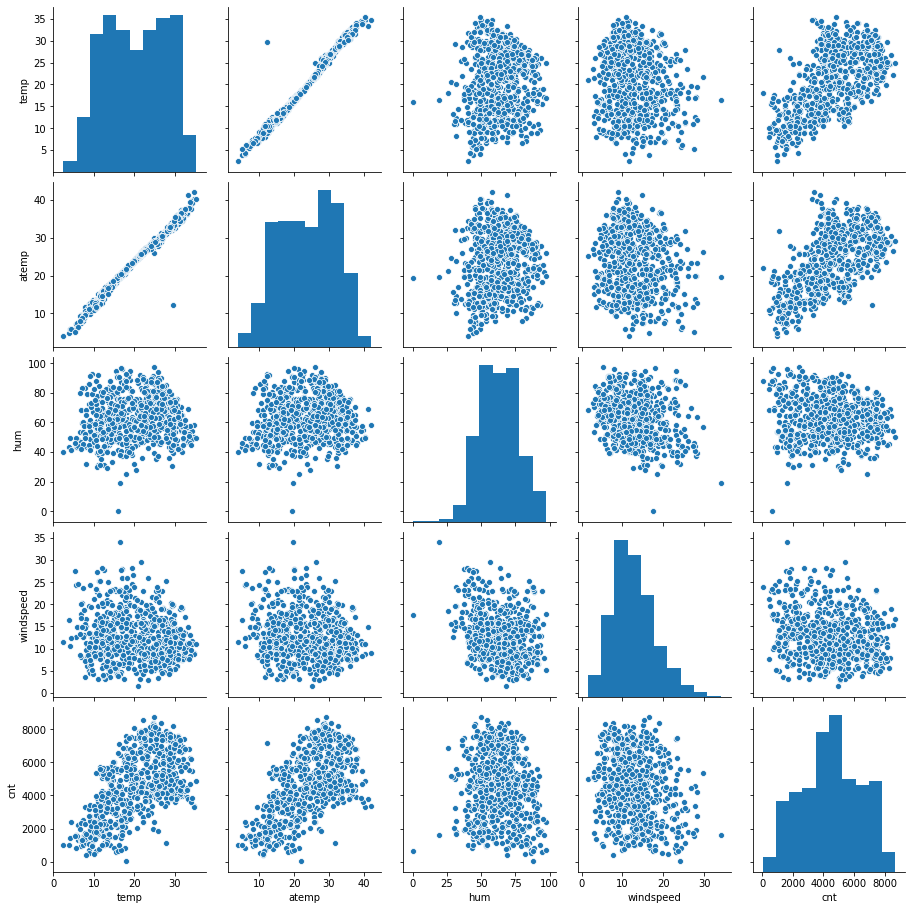

In [438]:
# Plot to check if there is any linear relationship
num_var = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bikes[num_var])

<b> Observations:</b>
 - The Above graph clearly shows that there is a linaer relationship between temp and cnt , atemp and cnt
 - Also it can be observed that there is also relationship between atemp and temp. But Not dropping either of atemp or temp and will be dropping one of those after creating the model, based on p-value and VIF

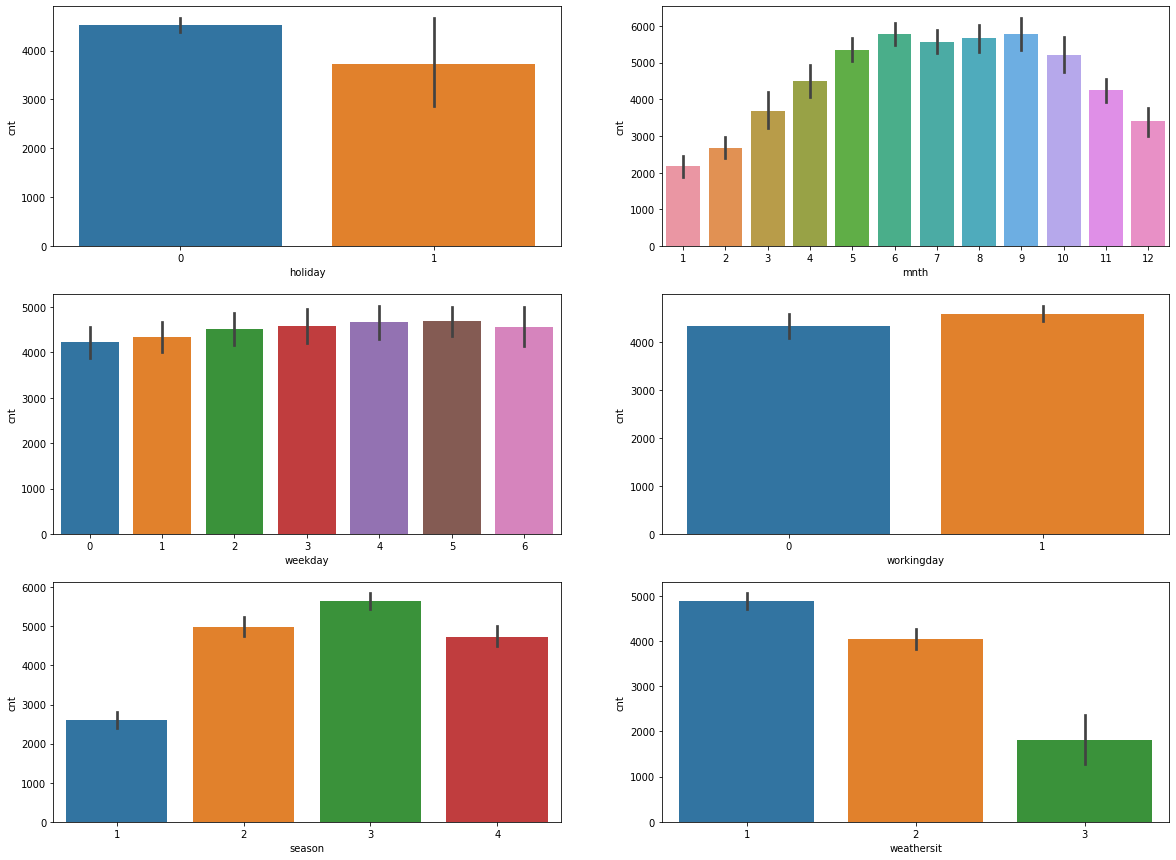

In [439]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.barplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,2,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,2,3)
sns.barplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,2,5)
sns.barplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,2,6)
sns.barplot(x = 'weathersit', y = 'cnt', data = bikes)

plt.show()


<b>Observations:</b>
 - The number of Users  seems to be increasing with increasing mnth till Sep with a slight dip in July and then decreaing
 - There are more number of users using bikes in sesaon 3 i.e., fall and lowest in 1:Spring
 - The number of customers seems to be increasing from Monday to Sunday.
 - There are no customers during weathersit:4 i.e., when there is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - There is a very slight variation when working day is considered, Bikes are being used slightly more on a working day than on weekend or holiday
 - More customers are using the services when its not a holiday rathar than on a holiday.



### Creating Dummy Variables for Categorical Variables

season : season (1:spring, 2:summer, 3:fall, 4:winter)<br>
yr : year (0: 2018, 1:2019)<br>
weathersit :
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
So although these seems to be numeric but in reality its a categorical variable<br>
Creating Dummies for these variables except yr, since it is already been labelled.

In [440]:
# Check value_counts of season
bikes.season.value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

Replacing 1: weathersit1, 2:weathersit2, 3: weathersit3 4: weathersit4 for clear understanding after creating dummies

In [441]:
# Create Dummies for season
d_season = pd.get_dummies(bikes['season'],prefix='season',drop_first=True)

# View d_season first few rows
d_season.head()

,season_2,season_3,season_4
instant,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [442]:
# Add the results to the original housing dataframe

bikes = pd.concat([bikes,d_season],axis = 1)

# display top 5 rows
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [443]:
# We don't require season anymore so removing that field
bikes.drop(['season'],axis=1,inplace=True)

In [444]:
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,
1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [445]:
# Create Dummies for season
d_weathersit = pd.get_dummies(bikes['weathersit'],prefix='weathersit',drop_first=True)

# View d_season first few rows
d_weathersit.head()

,weathersit_2,weathersit_3
instant,,
1,1,0
2,1,0
3,0,0
4,0,0
5,0,0


In [446]:
#check value_counts since we got only two columns unlike expected 3
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

So there are no customers in weathersit4

In [447]:
# Add the results to the original housing dataframe

bikes = pd.concat([bikes,d_weathersit],axis = 1)

# display top 5 rows
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [448]:
# We don't require season anymore so removing that field
bikes.drop(['weathersit'],axis=1,inplace=True)

# Display top 5 Rows
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [449]:
# Check shape of the data
bikes.shape

(730, 18)

In [450]:
#Check info of dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        730 non-null    object 
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   temp          730 non-null    float64
 7   atemp         730 non-null    float64
 8   hum           730 non-null    float64
 9   windspeed     730 non-null    float64
 10  casual        730 non-null    int64  
 11  registered    730 non-null    int64  
 12  cnt           730 non-null    int64  
 13  season_2      730 non-null    uint8  
 14  season_3      730 non-null    uint8  
 15  season_4      730 non-null    uint8  
 16  weathersit_2  730 non-null    uint8  
 17  weathersit_3  730 non-null    uint8  
dtypes: float64(4), int64(8), objec

Since we have only one column dteday as non-numeric lets divide it into day, month and year.

In [451]:
# Segregating into day,month and year
bikes['day'] = bikes['dteday'].apply(lambda x : int(str(x).split("-")[0]))
bikes['month'] = bikes['dteday'].apply(lambda x : int(str(x).split("-")[1]))
bikes['year'] = bikes['dteday'].apply(lambda x : int(str(x).split("-")[2]))

In [452]:
# Check top 5 rows of data
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day,month,year
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,...,654,985,0,0,0,1,0,1,1,2018
2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,...,670,801,0,0,0,1,0,2,1,2018
3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,...,1229,1349,0,0,0,0,0,3,1,2018
4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,...,1454,1562,0,0,0,0,0,4,1,2018
5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,...,1518,1600,0,0,0,0,0,5,1,2018


In [453]:
#check if both month and mnth have same values
bikes[bikes['mnth']!= bikes['month']]

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day,month,year
instant,,,,,,,,,,,,,,,,,,,,,


These both have same values. Same has been inferred from the meta data as well. So dropping variable month. <br>
Dropping dteday as well as we have all the required data from date fields in other variables of dataset

In [454]:
# Drop month and dteday
bikes.drop(['month','dteday'],axis=1,inplace=True)

#Display bikes
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day,year
instant,,,,,,,,,,,,,,,,,,,
1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,1,2018
2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,2,2018
3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,3,2018
4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,4,2018
5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,5,2018


In [455]:
# Check shpe
bikes.shape

(730, 19)

In [456]:
# Check Value_counts of year
bikes.year.value_counts()

2019    365
2018    365
Name: year, dtype: int64

As per the meta data provided <br>
yr : year (0: 2018, 1:2019) <br>
so lets compare yr and year and drop one of the row if both are one and the same

In [457]:
#check if both yr and year have same values
bikes['year'] = bikes['year'].apply(lambda x: 0 if x == 2018 else 1)

bikes[bikes['year']!= bikes['yr']]

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day,year
instant,,,,,,,,,,,,,,,,,,,


From above it is clear that both are same so lets drop year

In [458]:
# Drop year
bikes.drop(['year'],axis=1,inplace=True)

#Display bikes
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day
instant,,,,,,,,,,,,,,,,,,
1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,1
2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,2
3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,3
4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,4
5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,5


Now.. mnth and weekday and day have values other than 0 and 1. And these are not numerical variables whose value increases with increasing number, I assume its better we create dummy variables or bin them as well.

In [459]:
# Creating bins for day
# 1-15 :0 ; 16-31 :1
bikes['day_bin'] = bikes['day'].apply(lambda x : 0 if x<16 else 1)


# Check top 5 Rows
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day,day_bin
instant,,,,,,,,,,,,,,,,,,,
1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,1,0
2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,2,0
3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,3,0
4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,4,0
5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,5,0


In case of month we will be dividing them into 4 bins and then creating dummy variables

In [460]:
# Creating bins for mnth on quarterly basis
# 1-3 : Q1 , 4-6:Q2 , 7-9:Q3 , 10-12:Q4
bikes['mnth_bin'] = bikes['mnth'].apply(lambda x : 'Q1' if x<4 else 'Q2' if x<7 else 'Q3' if x<10 else 'Q4')


# Check value counts of mnth_bin
bikes.mnth_bin.value_counts()

Q4    184
Q3    184
Q2    182
Q1    180
Name: mnth_bin, dtype: int64

In [461]:
# Create dummies for mnth_bin
d_mnth_bin = pd.get_dummies(bikes['mnth_bin'],drop_first=True)

# display dummies dataframe
d_mnth_bin.head()

,Q2,Q3,Q4
instant,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [462]:
# Add the results to the original housing dataframe

bikes = pd.concat([bikes,d_mnth_bin],axis = 1)

# display top 5 rows
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,season_3,season_4,weathersit_2,weathersit_3,day,day_bin,mnth_bin,Q2,Q3,Q4
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,1,0,Q1,0,0,0
2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,2,0,Q1,0,0,0
3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,3,0,Q1,0,0,0
4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,4,0,Q1,0,0,0
5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,5,0,Q1,0,0,0


Before proceeding further, drop mnth, mnth_bin,day which are no longer required

In [463]:
# Drop mnth,mnth_bin,day
bikes.drop(['mnth','mnth_bin','day'],axis=1,inplace=True)

In [464]:
#Display info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   weekday       730 non-null    int64  
 3   workingday    730 non-null    int64  
 4   temp          730 non-null    float64
 5   atemp         730 non-null    float64
 6   hum           730 non-null    float64
 7   windspeed     730 non-null    float64
 8   casual        730 non-null    int64  
 9   registered    730 non-null    int64  
 10  cnt           730 non-null    int64  
 11  season_2      730 non-null    uint8  
 12  season_3      730 non-null    uint8  
 13  season_4      730 non-null    uint8  
 14  weathersit_2  730 non-null    uint8  
 15  weathersit_3  730 non-null    uint8  
 16  day_bin       730 non-null    int64  
 17  Q2            730 non-null    uint8  
 18  Q3            730 non-null    

Before creating dummies for weekday variable, lets give meaningful names to values for weekday

In [465]:
# Calculate value_counts for weekday
bikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

Modifying values as 
 - 0-Tue 
 - 1-Wed 
 - 2-Thu 
 - 3-Fri 
 - 4-Sat 
 - 5-Sun 
 - 6-Mon
Since 1-1-2018 is Monday and is given as 6 and 2-1-2018 is Tuesday is given as 0 and so on

In [466]:
# replace values as mentioned above
bikes['weekday'] = bikes['weekday'].replace({0: 'Tue', 1: 'Wed', 2: 'Thu', 3: 'Fri', 
                            4: 'Sat', 5: 'Sun' , 6:'Mon'})
bikes.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,day_bin,Q2,Q3,Q4
instant,,,,,,,,,,,,,,,,,,,,
1,0,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0
2,0,0,Tue,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,0,0,0,0
3,0,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0,0,0,0
4,0,0,Thu,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,0,0,0
5,0,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,0,0


In [467]:
# Create Dummy Variables for week day
d_weekday = pd.get_dummies(bikes['weekday'],drop_first=True)

# Display top 5 rows
d_weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,0,0,0


In [468]:
# Add the results to the original housing dataframe

bikes = pd.concat([bikes,d_weekday],axis = 1)

#Drop Weekday from dataset
bikes.drop('weekday',axis=1,inplace=True)

# display top 5 rows
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,day_bin,Q2,Q3,Q4,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [469]:
# View shape of variable
bikes.shape

(730, 25)

Since there are 25 columns, out of cnt is target variable or dependent variable, and casual and registered are also counts of the customers, we have 22 variables to predict from.. out of which I would like to get top 10 predictor variables using RFE (Recursive Feature Elimination)

In [470]:
# Drop Casual and Registered 
bikes.drop(['casual','registered'],axis=1,inplace=True)

bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,day_bin,Q2,Q3,Q4,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><i> Before going to RFE, lets create train and test sets and scale atemp,temp,hum,windspeed using Normalization (Min-Max Scaling)</i></b>

In [471]:
# Split into train and test sets
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [472]:
#  Check Shapes of trainand test sets
print(bikes_train.shape)
print(bikes_test.shape)

(510, 23)
(220, 23)


In [473]:
# Check top 5 rows of train set
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,day_bin,Q2,Q3,Q4,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,1,0,1,0,0,0,0,1,0,0
427,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,1,0,0,0,0,0
729,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,1,0,0,1,0,0,0,0,1,0
483,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,1,1,0,0,1,0,0,0,0,0
112,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,1,1,0,0,0,0,1,0,0,0


### Scaling

In [474]:
# Scale the predictor variables mentioned above
scalar = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
bikes_train[num_vars] = scalar.fit_transform(bikes_train[num_vars])

# Check top 5 rows
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,day_bin,Q2,Q3,Q4,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,1,0,1,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,1,0,0,0,0,1,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,1,1,0,0,1,0,0,0,0,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,1,1,0,0,0,0,1,0,0,0


### Creating functions for creating a model and calculating VIF 
 Assuming this function might be called several times

In [475]:
# Function for identifying top n predictors using RFE

def topnpredictors(n,X,y):
    lm = LinearRegression()
    lm.fit(X,y)
    rfe = RFE(lm,n)
    rfe = rfe.fit(X,y)
    return rfe


In [476]:
# Function for creating a model

def createModelCalculateVIF(X, y):
    lr_model = sm.OLS(y,X).fit()
    print(lr_model.summary())
    print("\n \n --------VIF--------")
    print(calculateVIF(X))             # Included to print VIF
    return lr_model

In [477]:
# Function to calculate VIF

def calculateVIF(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

### -- Create a Model by dividing into X and y sets-- 

###### Model-1: Model creation by picking top 10 predictors and narrowing down based on p and VIF values

In [478]:
# Create X_train and y_train
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [479]:
# Display X_train and y_train

print("----y-train-----")
print(y_train.head())

print("----X-train-----")
X_train.head()

----y-train-----
instant
577    0.827658
427    0.465255
729    0.204096
483    0.482973
112    0.191095
Name: cnt, dtype: float64
----X-train-----


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,day_bin,Q2,Q3,Q4,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,1,0,1,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,1,0,0,0,0,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,1,0,0,1,0,0,0,0,1,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,1,1,0,0,1,0,0,0,0,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,1,1,0,0,0,0,1,0,0,0


As I am going to use RFE which also takes the correlations into count while giving top n predictors not creating a seperate graph for it

In [480]:
# Getting top 10 predictors using RFE
rfe = topnpredictors(10,X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 5),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('day_bin', False, 13),
 ('Q2', False, 7),
 ('Q3', True, 1),
 ('Q4', False, 6),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', False, 12),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 9)]

In [481]:
# create list of columns that are to be considered
pred = X_train.columns[rfe.support_]

pred

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'weathersit_2', 'weathersit_3', 'Q3', 'Mon'],
      dtype='object')

### Building the model using statsmodels.api

In [482]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[pred]
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model = createModelCalculateVIF(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          4.47e-182
Time:                        21:06:51   Log-Likelihood:                 484.25
No. Observations:                 510   AIC:                            -946.5
Df Residuals:                     499   BIC:                            -899.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2170      0.028      7.662   

<b> Observations from Summary:</b>
 1. The R-Squared and Adj. R-Squared are ver high indicating that 82. % of variance is explained by the model
 2. Assuming the any p- value below 0.05 is a good indicator, we have only Mon above 0.05, all the other seems to be highly significant.
 3. It also tells us that hum,windspeed,weathersit_2,weathersit_3 are negitively corelated


<b>Observations from VIF:</b><br> All values are in below 5 so no multicollinearity<br>
We have also verified that Mon is not that significant so dropping that

In [483]:
# Drop Mon
X_train_rfe.drop('Mon',axis=1,inplace=True)

In [484]:
X_train_rfe.head()

,const,yr,temp,hum,windspeed,season_2,season_4,weathersit_2,weathersit_3,Q3
instant,,,,,,,,,,
577,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,1
427,1.0,1,0.442393,0.640189,0.255342,0,0,1,0,0
729,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,0
483,1.0,1,0.395666,0.504508,0.188475,1,0,1,0,0
112,1.0,0,0.345824,0.751824,0.380981,1,0,1,0,0


In [485]:
# create a model
lr_model = createModelCalculateVIF(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          9.45e-183
Time:                        21:06:57   Log-Likelihood:                 482.97
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     500   BIC:                            -903.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2218      0.028      7.866   

<b>Observations on Summary:</b>
 - All the predictors are highly significant and also the R-squared and Adj. R-Squared are very close indicating it as a good model. 



<b>Observations on VIF</b>
 - All the VIF values are very low except for constant which we are not bothered about. So this might be the best model if all the predictions go as expected.



### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed  let us plot the distplot of the error terms and see what it looks like.

In [486]:
# Calculate predicted values
y_train_predict = lr_model.predict(X_train_rfe)

<Figure size 1440x720 with 0 Axes>

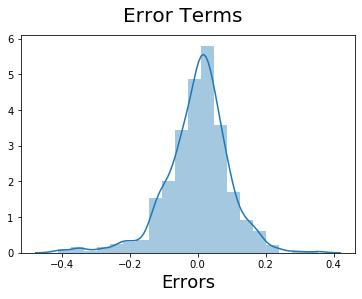

In [487]:
# Plot distplot of residuals
plt.figure(figsize=(20, 10))
fig = plt.figure()
sns.distplot((y_train - y_train_predict),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     
plt.show()

<b> Observations </b>
 - As expected the residuals are following a normal distribution with mean zero.

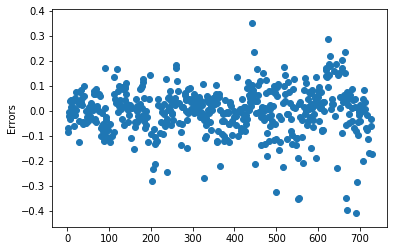

In [488]:
# Plot a scatter plot to verify assumption on residuals
plt.scatter(X_train_rfe.index,y_train - y_train_predict)
plt.ylabel('Errors')
plt.show()

<b> Observations </b>
 - As assumed, The errors doesnot seem to follow any order and are independent of each other
 - Als the variance among error terms seems to be constant mostly.

### Making Predictions

In [489]:
# Transform the test data

num_vars = ['temp','atemp','hum','windspeed','cnt']

bikes_test[num_vars] = scalar.transform(bikes_test[num_vars])

bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,day_bin,Q2,Q3,Q4,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,0,1
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,1,1,0,0,0,0,0,0,0,0
300,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,1,0,0,0,0
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,1,0,0,0,0,0,0,0
153,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,1,0,0,0,1,0,0,0,0


In [490]:
# Identify X_test and y_test

y_test = bikes_test.pop('cnt')

In [491]:
# Add constant
bikes_test = sm.add_constant(bikes_test)

# preapre X_test to have same columns present in X_train_rfe
X_test = bikes_test[X_train_rfe.columns]

print(y_test.head())

X_test.head()

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
Name: cnt, dtype: float64


,const,yr,temp,hum,windspeed,season_2,season_4,weathersit_2,weathersit_3,Q3
instant,,,,,,,,,,
185,1.0,0,0.831783,0.657364,0.084219,0,0,1,0,1
536,1.0,1,0.901354,0.610133,0.153728,1,0,0,0,0
300,1.0,0,0.511964,0.837699,0.334206,0,1,1,0,0
222,1.0,0,0.881625,0.437098,0.339570,0,0,0,0,1
153,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0


In [492]:
# Making predictions
y_test_pred = lr_model.predict(X_test)

## Model Evaluation

In [493]:
# Calculate r-squared
r2_score(y_test, y_test_pred)

0.7927579814847101

We have a variation of 3% in train and test . Trying to check if there are any other best fit models (Trying to check of i did overfit by anychance)

###### Model-2: Model creation by picking top 7 predictors and narrowing down based on p and VIF values

### Model Creation

In [494]:
# Getting top 10 predictors using RFE
rfe=topnpredictors(7,X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 8),
 ('season_4', True, 1),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1),
 ('day_bin', False, 16),
 ('Q2', False, 10),
 ('Q3', False, 2),
 ('Q4', False, 9),
 ('Mon', False, 4),
 ('Sat', False, 14),
 ('Sun', False, 15),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 12)]

In [495]:
# create list of columns that are to be considered
pred = X_train.columns[rfe.support_]

pred

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'weathersit_3'],
      dtype='object')

In [496]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[pred]

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,temp,hum,windspeed,season_2,season_4,weathersit_3
instant,,,,,,,,
577,1.0,1,0.815169,0.725633,0.264686,0,0,0
427,1.0,1,0.442393,0.640189,0.255342,0,0,0
729,1.0,1,0.245101,0.498067,0.663106,0,0,0
483,1.0,1,0.395666,0.504508,0.188475,1,0,0
112,1.0,0,0.345824,0.751824,0.380981,1,0,0


In [497]:
# create a model
lr_model = createModelCalculateVIF(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.06e-177
Time:                        21:07:48   Log-Likelihood:                 465.19
No. Observations:                 510   AIC:                            -914.4
Df Residuals:                     502   BIC:                            -880.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2503      0.027      9.142   

<b>Observations</b>
 - All the VIF values are below 5 and all variables are significant

### Residual Analysis of the train data

In [498]:
# Calculate predicted values
y_train_predict = lr_model.predict(X_train_rfe)

<Figure size 1440x720 with 0 Axes>

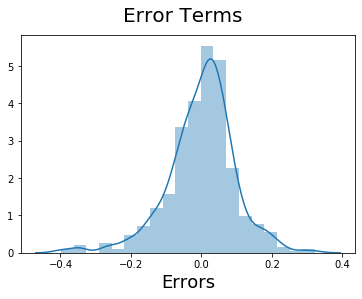

In [499]:
# Plot distplot of residuals
plt.figure(figsize=(20, 10))
fig = plt.figure()
sns.distplot((y_train - y_train_predict),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     
plt.show()


<b>Observations</b><br>

As expected the residuals are following a normal distribution with mean zero.

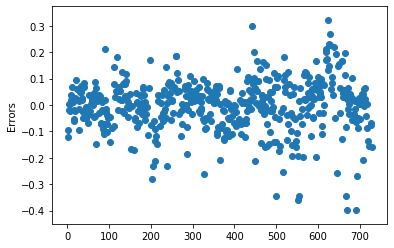

In [500]:
# Plot a scatter plot to verify assumption on residuals
plt.scatter(X_train_rfe.index,y_train - y_train_predict)
plt.ylabel('Errors')
plt.show()

<b>Observations</b>

 - As assumed, The errors doesnot seem to follow any order and are independent of each other
 - The variance among error terms seems to be constant mostly.

### Making Predictions

In [501]:
# preapre X_test to have same columns present in X_train_rfe
X_test = bikes_test[X_train_rfe.columns]

print(y_test.head())

X_test.head()

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
Name: cnt, dtype: float64


,const,yr,temp,hum,windspeed,season_2,season_4,weathersit_3
instant,,,,,,,,
185,1.0,0,0.831783,0.657364,0.084219,0,0,0
536,1.0,1,0.901354,0.610133,0.153728,1,0,0
300,1.0,0,0.511964,0.837699,0.334206,0,1,0
222,1.0,0,0.881625,0.437098,0.339570,0,0,0
153,1.0,0,0.817246,0.314298,0.537414,1,0,0


In [502]:
# Making predictions
y_test_pred = lr_model.predict(X_test)

### Model Evaluation

In [503]:
# Calculate r-squared
r2_score(y_test, y_test_pred)

0.7840556156317731

<b>Observation:</b>
 This seems to be a good model as the r-squared value is close enough. But we have a better model with better R-Squared vales.
 
 
 To be sure lets check the difference in r-squared when predictors are 8 .

###### Model-3: Model creation by picking top 8 predictors and narrowing down based on p and VIF values

### Model Creation

In [504]:
# Top 8 Predictors rfe
rfe = topnpredictors(8,X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('day_bin', False, 15),
 ('Q2', False, 9),
 ('Q3', True, 1),
 ('Q4', False, 8),
 ('Mon', False, 3),
 ('Sat', False, 13),
 ('Sun', False, 14),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 11)]

In [505]:
# create list of columns that are to be considered
pred = X_train.columns[rfe.support_]

pred

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'weathersit_3', 'Q3'],
      dtype='object')

In [506]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[pred]

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,temp,hum,windspeed,season_2,season_4,weathersit_3,Q3
instant,,,,,,,,,
577,1.0,1,0.815169,0.725633,0.264686,0,0,0,1
427,1.0,1,0.442393,0.640189,0.255342,0,0,0,0
729,1.0,1,0.245101,0.498067,0.663106,0,0,0,0
483,1.0,1,0.395666,0.504508,0.188475,1,0,0,0
112,1.0,0,0.345824,0.751824,0.380981,1,0,0,0


In [507]:
# create a model
lr_model = createModelCalculateVIF(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.85e-179
Time:                        21:08:01   Log-Likelihood:                 472.30
No. Observations:                 510   AIC:                            -926.6
Df Residuals:                     501   BIC:                            -888.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2635      0.027      9.670   

### Residual Analysis

In [508]:
# Calculate predicted values
y_train_predict = lr_model.predict(X_train_rfe)

<Figure size 1440x720 with 0 Axes>

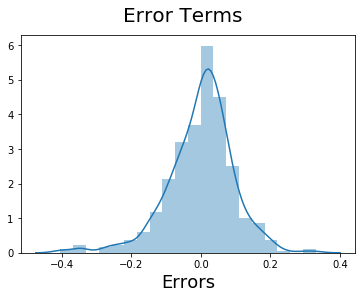

In [509]:
# Plot distplot of residuals
plt.figure(figsize=(20, 10))
fig = plt.figure()
sns.distplot((y_train - y_train_predict),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     
plt.show()

<b>Observations</b>

As expected the residuals are following a normal distribution with mean zero.

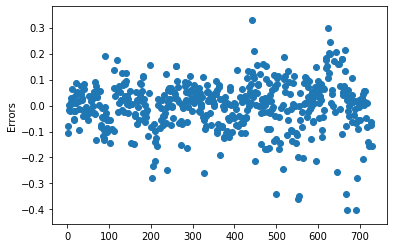

In [510]:
# Plot a scatter plot to verify assumption on residuals
plt.scatter(X_train_rfe.index,y_train - y_train_predict)
plt.ylabel('Errors')
plt.show()


<b>Observations</b>

 - As assumed, The errors doesnot seem to follow any order and are independent of each other
 - The variance among error terms seems to be constant mostly.

### Model Predictions

In [511]:
# preapre X_test to have same columns present in X_train_rfe
X_test = bikes_test[X_train_rfe.columns]

print(y_test.head())

X_test.head()

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
Name: cnt, dtype: float64


,const,yr,temp,hum,windspeed,season_2,season_4,weathersit_3,Q3
instant,,,,,,,,,
185,1.0,0,0.831783,0.657364,0.084219,0,0,0,1
536,1.0,1,0.901354,0.610133,0.153728,1,0,0,0
300,1.0,0,0.511964,0.837699,0.334206,0,1,0,0
222,1.0,0,0.881625,0.437098,0.339570,0,0,0,1
153,1.0,0,0.817246,0.314298,0.537414,1,0,0,0


In [512]:
# Making predictions
y_test_pred = lr_model.predict(X_test)

### Model Evaluations

In [513]:
# Calculate r-squared
r2_score(y_test, y_test_pred)

0.7901316751448463

<b>Observation:</b>
    <br>Here the r-squared for training has increased when compared to model -2 but less as compared to model-1. So assuming model-1 is best fit

<b>Procedure Followed</b><br>
 - I started with understanding of the data and continued to creating dummy variables for all the categorical data.
 - I removed all the unnecessary columns after creating dummy data. I was left with 23 columns of which cnt is target variable and all the others might be predictors
 - Then I have scaled the variables using MinMaxScaling
 - Then I created a model by picking top 10 features and narrowing down based on VIF and p-values and did evaluate the model .
 - I have repeated the same steps by taking top 7,8 features and made observations as already the number of predictors while doing for 10 have been reduced to 9 to be extra sure of the model
 - Then after looking at the r-squared values of train and test set below observations are made.
> - The correlation with other predictors peeped in only when i considered top 10 predictors and there were no such correlations below that. 
> - Also we got high percentage of R-squared when number of predictors are 9, that is 82.5% and 79.27% on test thus creating a very good model. so considering Model-1 as the best fit model

### Conclusion:
<b>Based on above Observations Model-1 is best fit model with 9 predictorsi.e.,</b>
 
  $ cnt = 0.2218 + 0.2298 \times yr + 0.5146 \times temp - 0.1539 \times hum - 0.1862 \times windspeed  +                 0.1125 \times season\_2 + 0.1515 \times season\_4 - 0.0508 \times weathersit\_2 - 0.2317 \times weathersit\_3 + 0.0687  \times  Q3 $
    
  where <br>weathersit\_3 :  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
            weathersit\_2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
            season\_2 : summer<br>
            season\_4 : winter<br>
            Q3 : month 7-9